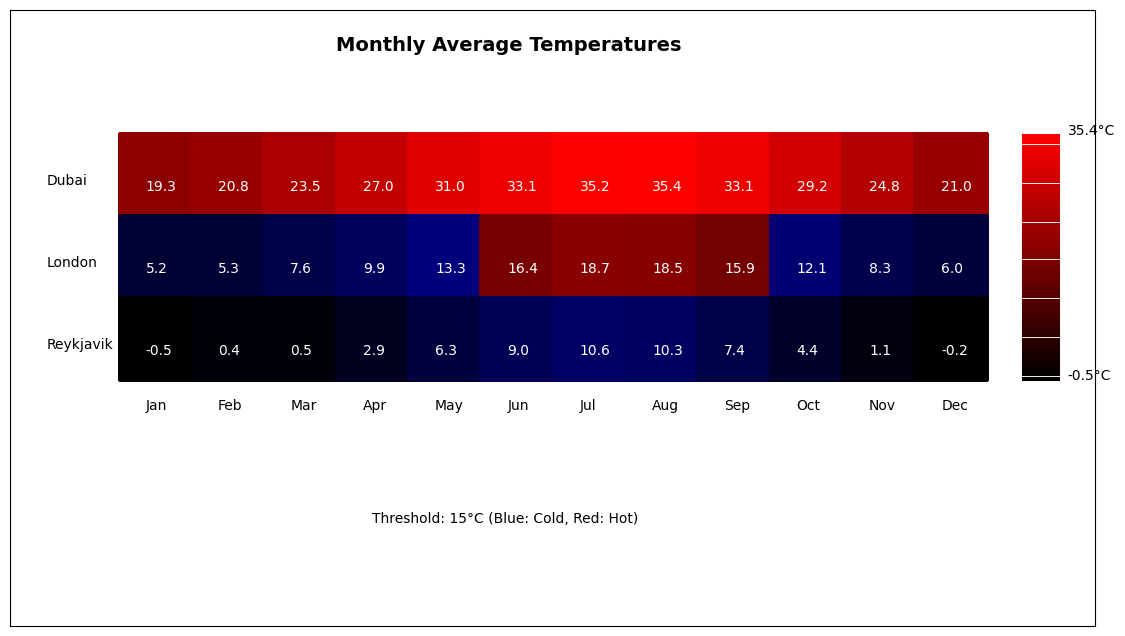

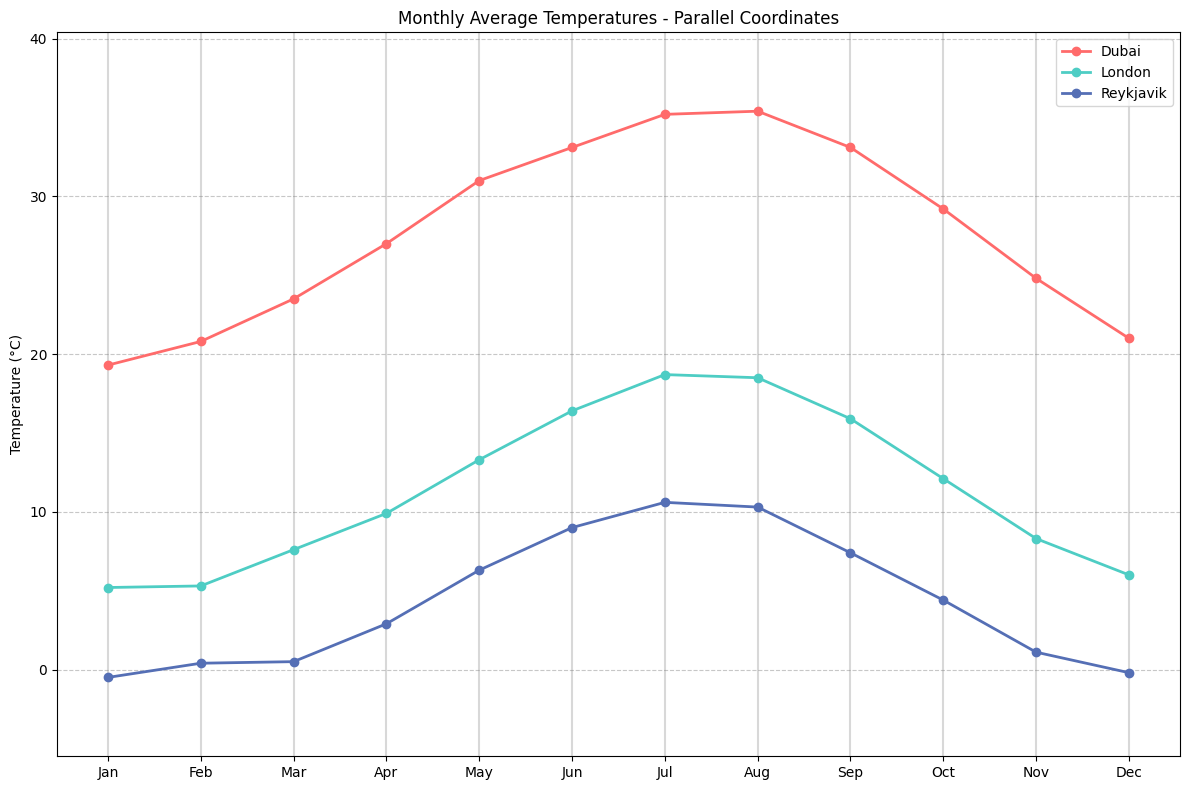

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Create arrays for each city
Dubai = np.array([19.3, 20.8, 23.5, 27.0, 31.0, 33.1, 35.2, 35.4, 33.1, 29.2, 24.8, 21.0], dtype=float)
London = np.array([5.2, 5.3, 7.6, 9.9, 13.3, 16.4, 18.7, 18.5, 15.9, 12.1, 8.3, 6.0], dtype=float)
Reykjavik = np.array([-0.5, 0.4, 0.5, 2.9, 6.3, 9.0, 10.6, 10.3, 7.4, 4.4, 1.1, -0.2], dtype=float)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data = np.array([Dubai, London, Reykjavik])

# Combine into a 2D array
Cities = np.array([Dubai, London, Reykjavik])

# Calculate overall statistics
overall_mean = np.mean(Cities)
overall_std = np.std(Cities)

# Calculate statistics per city
dubai_mean = np.mean(Dubai)
london_mean = np.mean(London)
reykjavik_mean = np.mean(Reykjavik)

dubai_std = np.std(Dubai)
london_std = np.std(London)
reykjavik_std = np.std(Reykjavik)

# Task 2: Create a heat map visualization
def draw_box(x, y, size, r, g, b):
    for i in range(0, int(size)):
        if r < 0:
            r = int(0)
        if r > 255:
            r = int(255)
        if g < 0:
            g = int(0)
        if g > 255:
            g = int(255)
        if b < 0:
            b = int(0)
        if b > 200:
            b = int(200)
        plt.fill_between([x, x + size], y, y + size, color=(r/255.0, g/255.0, b/200.0))


def create_heat_map(temp_data, city_names, threshold=15):

    # Extract min and max values
    min_temp = np.min(temp_data)
    max_temp = np.max(temp_data)

    # Set up the plotting area
    plt.figure(figsize=(14, 8))
    plt.axis([0, 600, 0, 300])
    plt.xticks([])
    plt.yticks([])

    # Box parameters
    box_size = 40
    offset_x = 15
    offset_y = 12

    # Draw heat map
    for i in range(temp_data.shape[0]):  # For each city
        for j in range(temp_data.shape[1]):  # For each month
            # Calculate color intensity based on temperature
            color_code = int(((temp_data[i, j] - min_temp) / (max_temp - min_temp)) * 255)

            # Position for the box
            x_pos = 60 + box_size * j
            y_pos = 200 - box_size * i

            # Draw box with different base colors based on threshold
            if temp_data[i, j] < threshold:
                draw_box(x_pos, y_pos, box_size, 0, 0, color_code)  # Cold -> Blue
            else:
                draw_box(x_pos, y_pos, box_size, color_code, 0, 0)  # Hot -> Red

            # Add temperature value text
            plt.text(x_pos + offset_x, y_pos + offset_y,
                     f"{temp_data[i, j]:.1f}", color='white')

    # Draw color scale with the same height as the number of cities
    color_height = box_size * len(city_names)  # Height of the color scale
    color_top = 200 - box_size * (len(city_names) - 1)
    for i in range(color_height):
        intensity = int((i / color_height) * 255)
        y = color_top + i
        plt.plot([560, 580], [y, y], color=(intensity / 255.0, 0, 0))

    plt.text(585, color_top, f"{min_temp:.1f}°C")
    plt.text(585, color_top + color_height - 1, f"{max_temp:.1f}°C")

    # Add month labels
    for j, month in enumerate(months):
        plt.text(60 + box_size * j + 15, 105, month)

    # Add city labels
    for i, city in enumerate(city_names):
        plt.text(20, 200 - box_size * i + 15, city)

    # Add title and other information
    plt.text(180, 280, "Monthly Average Temperatures", fontsize=14, weight='bold')
    plt.text(200, 50, f"Threshold: {threshold}°C (Blue: Cold, Red: Hot)", fontsize=10)
    plt.savefig('heatmap.png', dpi=300)
    plt.show()

# Use the function to create heat map
create_heat_map(data, ['Dubai', 'London', 'Reykjavik'], threshold=15)

def create_parallel_coordinates(temp_data, city_names):
    plt.figure(figsize=(12, 8))
    # Colors for each city
    colors = ['#FF6B6B', '#4ECDC4', '#556FB5']

    # Draw vertical lines for each month
    for i in range(len(months)):
        plt.axvline(x=i, color='gray', linestyle='-', alpha=0.3)

    # Plot temperature lines for each city
    for i, city in enumerate(city_names):
        plt.plot(range(12), temp_data[i], marker='o', linewidth=2,
                 label=city, color=colors[i])

    # Set axis labels and limits
    plt.xticks(range(12), months)
    plt.ylabel('Temperature (°C)')
    plt.title('Monthly Average Temperatures - Parallel Coordinates')

    # Add grid and legend
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='upper right')

    # Ensure y-axis includes all data points with some padding
    min_temp = np.min(temp_data) - 5
    max_temp = np.max(temp_data) + 5
    plt.ylim(min_temp, max_temp)

    plt.tight_layout()
    plt.savefig('parallel.png', dpi=300)
    plt.show()

# Use the function to create parallel coordinates visualization
create_parallel_coordinates(data, ['Dubai', 'London', 'Reykjavik'])